# Intro to Neural Networks Classificaition with TensorFlow

Classification is a task that requires the model to learn how to assign a class label to examples from the problem domain. An easy to understand example is classifying emails as “spam” or “not spam.”

Types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make examples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42,)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# checks the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

The data is a little hard to understand so we need to visualize it.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

circles =pd.DataFrame({'X0':X[:,0], "X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


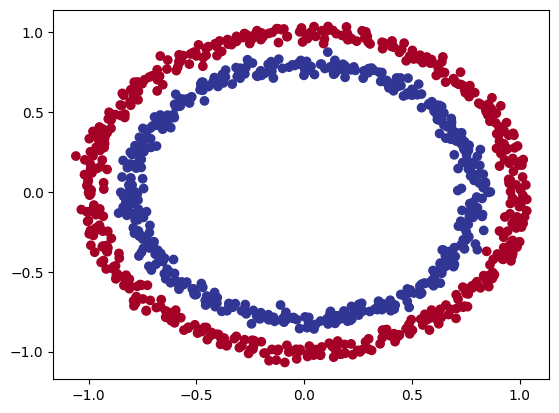

In [ ]:
# Visualize with a plot
plt.scatter(circles['X0'],circles['X1'],c=y,cmap=plt.cm.RdYlBu);

This is a good resource to learn and help learn **TensorFlow Playground** - https://playground.tensorflow.org/

## Input and output shapes

In [ ]:
# Check the shapes of features and labels
X.shape, y.shape

((1000, 2), (1000,))

So in this case the input shape= [2] and output shape = [1]

In [ ]:
# How many samples we are working with
len(X), len(y)

(1000, 1000)

In [ ]:
# view first sample of feature and label
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling



In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 4.3944 - accuracy: 0.4750
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 3.7957 - accuracy: 0.4730
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.2325 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7267 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7046 - accuracy: 0.4990


In [ ]:
# Evaluate the model
model_1.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6980 - accuracy: 0.4960


[0.6980414986610413, 0.4959999918937683]

This is just the trial code -- never do this in proctice

In [ ]:
# Lets try to imporove the model
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are doing a binary classification problem we are  getting an accuracy of 50% so the model is guessing so lets try adding a layer to see what happens,

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933358907699585, 0.5]

The model is still getting only 50% of the predictiosn right,

## Improve our model

* imporve the quality of data
* increase number of hidden layers or neurons
* change the activation functions
* change the loss or optimizer used
* change the number of epochs

**Increaing number of hidden units and adding a layer (use Adam as optimizer)**

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model (3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # added 100 dense neurons
    tf.keras.layers.Dense(10), # adding another layer
    tf.keras.layers.Dense(1),
])

# compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# evaluat model_3
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.5070


[0.6992586851119995, 0.5070000290870667]

In [ ]:
# Visualize the model
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


## Function to plot decision boundary for the predictions and actual values called `plot_decision_boundary`:

* Take in a trained model, features (X) and labels(y)
*  create a meshgrid of the different X values
* Make predictions across the meshgid
* plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary create by a model predicting on X
  this function is from "made with ml" and "cs321n"
  """

  # Defining the axis of the plot to create the meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx , yy = np.meshgrid(np.linspace(x_min, x_max),
                        np.linspace(y_min, y_max))

  # Create X values (make predictions on this)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0]) > 1:
    print('Doing multi-class classification')
    # we need to reshape our predictiosn to get them ready for plotting
    y_pred = np.argmax(y_pred , axis=1).reshape(xx.shape)
  else:
    print("It is a binary classification")
    y_pred = np.round(y_pred ).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy ,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1], c = y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

79/79 [==============================] - 0s 1ms/step
It is a binary classification


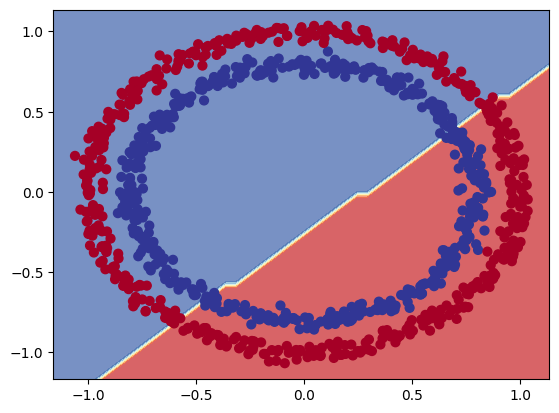

In [ ]:
# check out predictions model is making
plot_decision_boundary(model_3, X, y)

In this model we can see the model is performing stargely, as the data is non-linear but the decision boundary is linear.

In [ ]:
# let s try to fit the model to a regression problem

# create regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

# split the regression data in train and test set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train =  y_regression[:150]
y_reg_test =  y_regression[150:]


In [ ]:
X_reg_train , y_reg_train

(<tf.Tensor: shape=(150,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745], dtype=int32)>,
 <tf.Tensor: shape=(150,), dtype=int32, numpy=
 array([100, 105, 110, 115, 120, 125, 130, 1

`model_3.fit(X_reg_train, y_reg_train, epochs=100)` # this will give us a shape error and also we compiled the model for a binary classification problem (loss function) so we recreate `model_3`

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_3_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model with a regressin specific loss function
model_3_reg.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# fit the model
model_3_reg.fit(X_reg_train, y_reg_train, epochs=100, verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 473.2228 - mae: 473.2228
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 359.5203 - mae: 359.5203
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 248.5827 - mae: 248.5827
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 131.4941 - mae: 131.4941
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 50.8193 - mae: 50.8193
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 87.4236 - mae: 87.4236
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 75.0720 - mae: 75.0720
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 44.7966 - mae: 44.7966
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 52.1322 - mae: 52.1322
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.7004 - mae: 42.7004
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 8ms/step


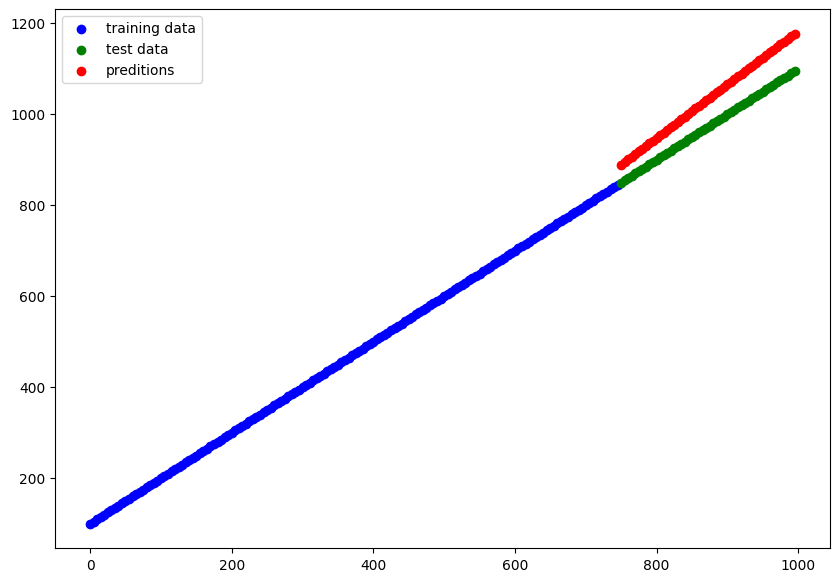

In [ ]:
# Make predictions and plot it
y_reg_preds = model_3_reg.predict(X_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="test data")
plt.scatter(X_reg_test, y_reg_preds, c='r', label="preditions")
plt.legend()

The missing piece -> non-linearity

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear),
])

# compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# fit the model to the circular data
history = model_4.fit(X, y, epochs=100, verbose=0)

In [ ]:
# evaluate the model_4
model_4.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 3.7608 - accuracy: 0.4750


[3.7608249187469482, 0.4749999940395355]

79/79 [==============================] - 0s 1ms/step
It is a binary classification


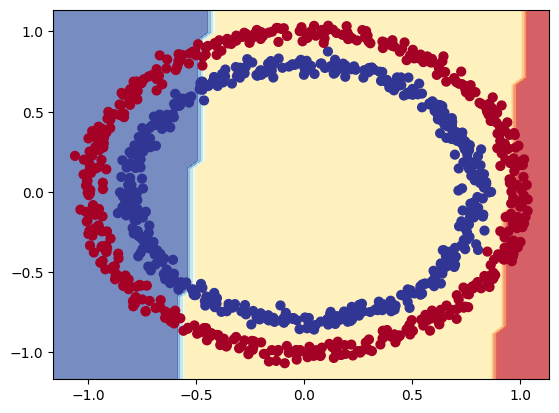

In [ ]:
# check our data -> plot
plot_decision_boundary(model_4 , X, y)

**Add activation function as `relu`**

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu),
])


# compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# fit the model to the circular data
history = model_5.fit(X, y, epochs=100, verbose=0)

In [ ]:
# evaluate the model_4
model_5.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 4.6902 - accuracy: 0.4700


[4.690217018127441, 0.4699999988079071]

79/79 [==============================] - 0s 1ms/step
It is a binary classification


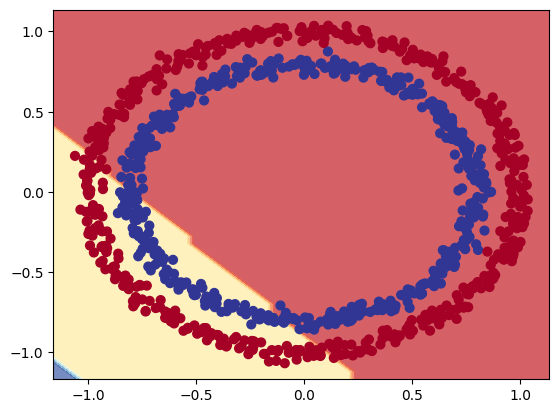

In [ ]:
# check our data -> plot
plot_decision_boundary(model_5 , X, y)

**Add activation function as `relu` and add layer and increase number of neurons**

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid),
])


# compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])


# fit the model to the circular data
history = model_6.fit(X, y, epochs=100, verbose=0)

In [ ]:
# evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.9930


[0.5215011239051819, 0.9929999709129333]

79/79 [==============================] - 0s 1ms/step
It is a binary classification


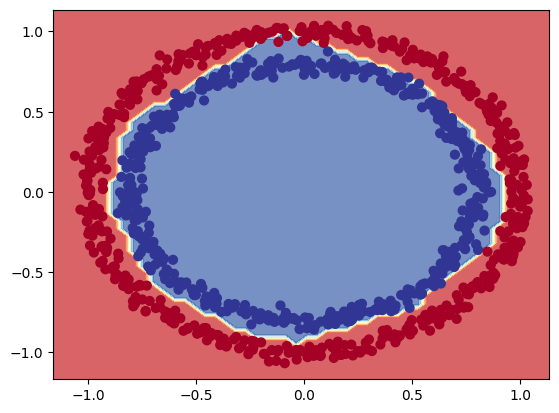

In [ ]:
# visualize the predictions
plot_decision_boundary(model_6, X, y)

Text(0, 0.5, 'epochs')

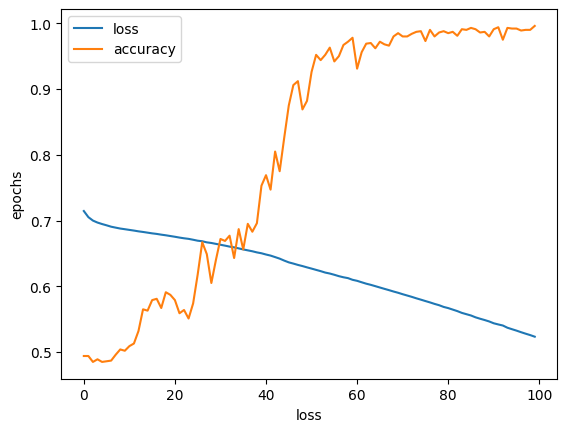

In [ ]:
# visualize the loss curve
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")

**Increasing the number of hidden layers and hidden units**

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid),
])


# compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])


# fit the model to the circular data
history = model_7.fit(X, y, epochs=100, verbose=0)

In [ ]:
# evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000


[0.003999634645879269, 1.0]

79/79 [==============================] - 0s 1ms/step
It is a binary classification


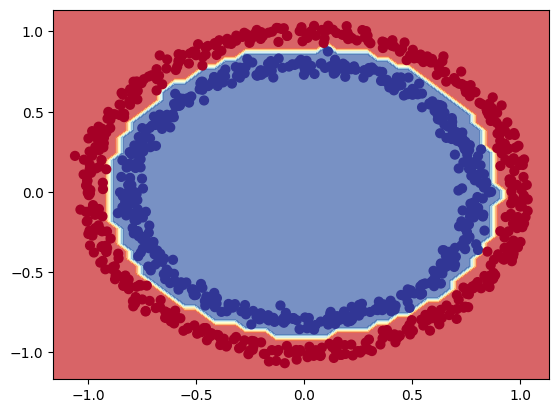

In [ ]:
# visualize the predictions
plot_decision_boundary(model_7, X, y)

Text(0, 0.5, 'epochs')

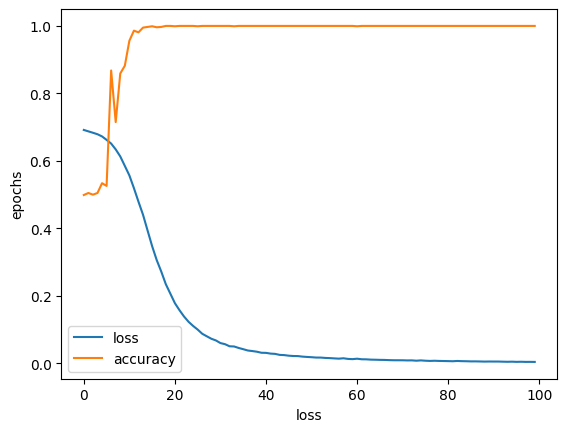

In [ ]:
# visualize the loss curve
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")

This is an overfit model as the it is fit on the training data completely however this is a really interesting decision boundary

In [ ]:
# Creat e a toy tensor similar to data we pass into our model
A = tf.cast(tf.range(-10,10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

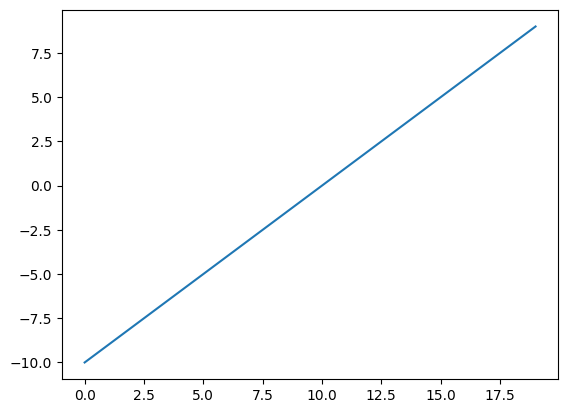

In [ ]:
# visualize the toy tensor
plt.plot(A);

In [ ]:
# make a sgmoid functions
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

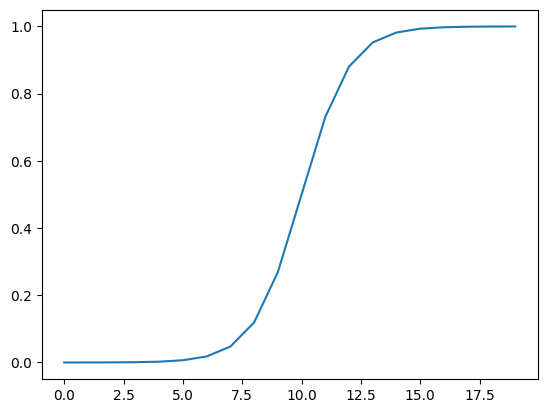

In [ ]:
# Apply sigmoid to toy tensor and visualize the output
plt.plot(sigmoid(A))

In [ ]:
# make a relu functions
def relu(x):
  return tf.maximum(0, x)

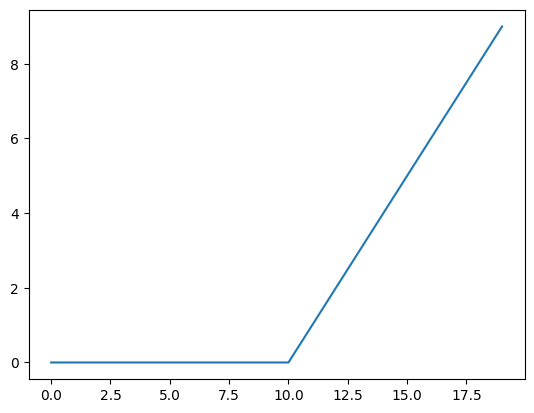

In [ ]:
# Apply relu to toy tensor and visualize the output
plt.plot(relu(A));

## Evaluting and improving the classification model

In [ ]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

**Improving the quality of data and splitting into train and test sets to actually start evaluating the model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
# Recreate the model
tf.random.set_seed(42)

# create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # increasing the learning rate
                metrics=["accuracy"])

# fit the model on the training data with reduced epochs
history = model_8.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
25/25 [==============================] - 1s 3ms/step - loss: 0.6899 - accuracy: 0.5013
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6125
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.6725
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.9162
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.9275
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2554 - accuracy: 0.9812
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2001 - accuracy: 0.9825
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.1563 - accuracy: 0.9925
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.1232 - accuracy: 0.9962
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 0.1046 - accuracy: 0.9987


Here we can observer some overshooting at 25 epochs to reduce to 15

In [ ]:
# Evaluate the model on the testing data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 1.0000


[0.11250673979520798, 1.0]

From this we can observe the model is extremely well trained with a amazing accuracy of 99.5 % lets plot  the decision boundary

79/79 [==============================] - 0s 1ms/step
It is a binary classification
79/79 [==============================] - 0s 1ms/step
It is a binary classification


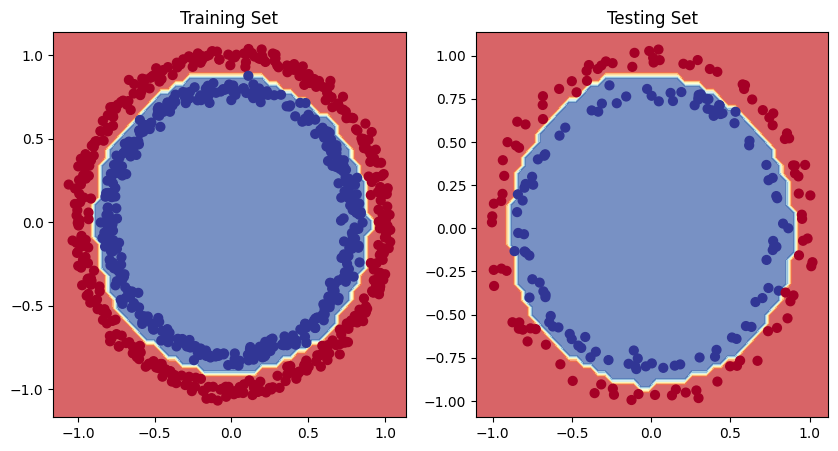

In [ ]:
# plot the decision boundary
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Training Set")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Testing Set")
plot_decision_boundary(model_8, X_test, y_test)
plt.show();

In [ ]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               300       
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


## Plot the loss (or training) curves

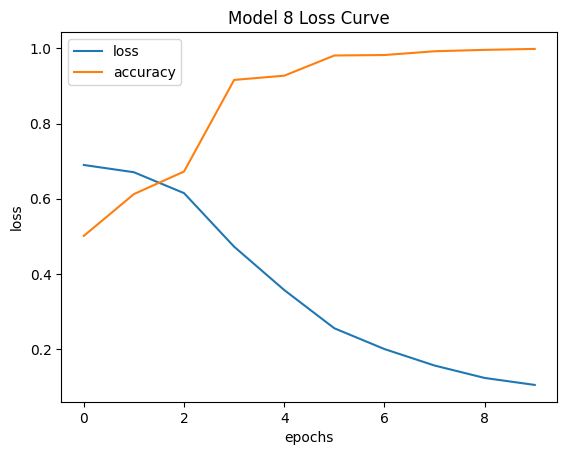

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model 8 Loss Curve")
plt.ylabel("loss")
plt.xlabel('epochs')
plt.legend();

* Loss going down is good
* Accuracy is going up is good

## Finding the best learning rate

to find the ideal learning rate, we are goinging to follow the steps:
* A learning rate **callback** - it is an extra piece of functionality that can be added that works *during* the training
* need a new learning rate visulations for different model parameters

In [ ]:
# Recreate the model
tf.random.set_seed(42)

# create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # increasing the learning rate
                metrics=["accuracy"])

# introduce the learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# fit the model (passing the lr_schedular callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      verbose=1,
                      callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6959 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4963 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4900 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

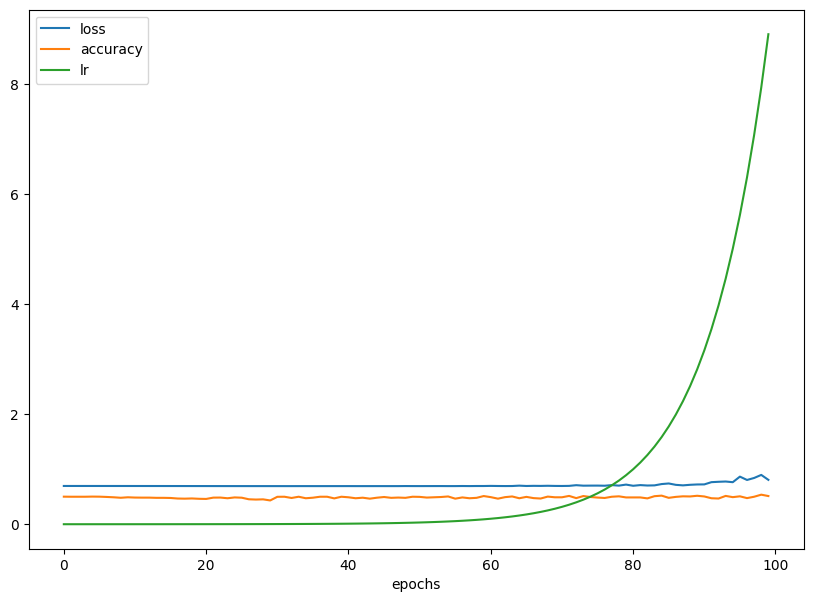

In [ ]:
# Check out the history
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs")
plt.show();

From this we can conclude that the number of optimal epochs here is arounf 40-50 after which we observe over shooting and increase in loss

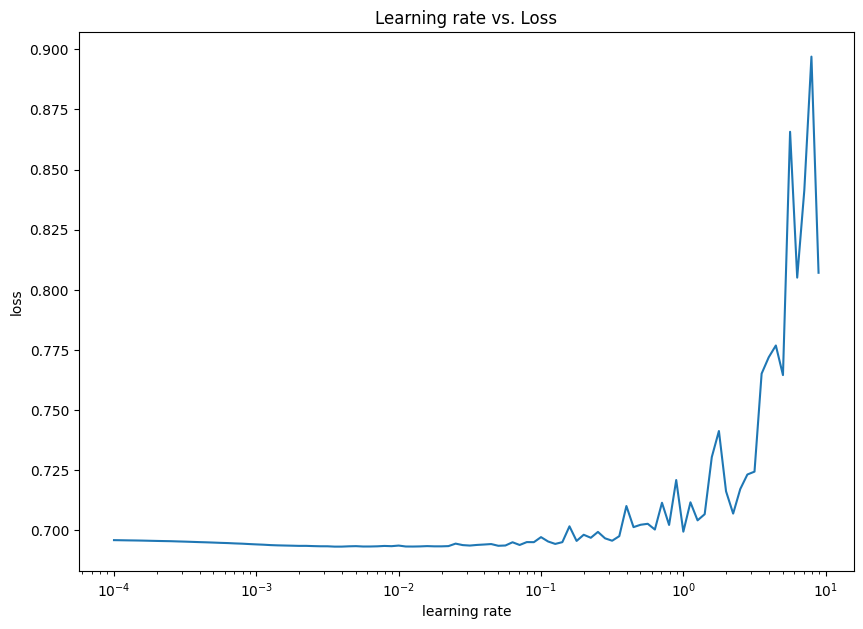

In [ ]:
# plot learning_rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel("learning rate")
plt.ylabel('loss')
plt.title("Learning rate vs. Loss");

We are trying to pick the point at which the learning rate corresponding to the decreaing loss along the downward slope not at the botton so here between 10^-2 (closer to this point) to 10^-1

## Creating the model with the ideal learning rate
learning rate = 0.02 (guess from the above graph) or epochs from 45-50

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model similar to model_9
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])


# compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
                 metrics=["accuracy"])


# creating the lr schedular callback
# lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10 ** (epoch/20))


# fitting the model
history_10 = model_10.fit(X_train,
                          y_train,
                          epochs=20, # found this from trial and error from the above graph
                          verbose=1,)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5088
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.4988
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5512
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.6438
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7013
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5345 - accuracy: 0.7550
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7875
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.8012
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8163
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8325
Epoch 11/20
25/25 [

In [ ]:
# evaluate the model
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2902 - accuracy: 0.8950


[0.2901916801929474, 0.8949999809265137]

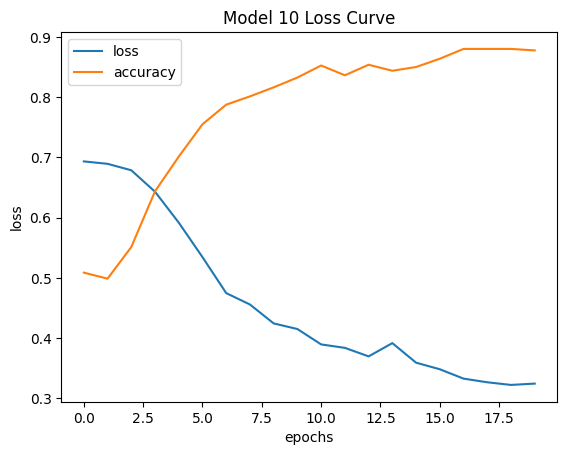

In [ ]:
# visualize the loss curve
pd.DataFrame(history_10.history).plot()
plt.title("Model 10 Loss Curve")
plt.ylabel("loss")
plt.xlabel('epochs')
plt.legend();

79/79 [==============================] - 0s 1ms/step
It is a binary classification
79/79 [==============================] - 0s 1ms/step
It is a binary classification


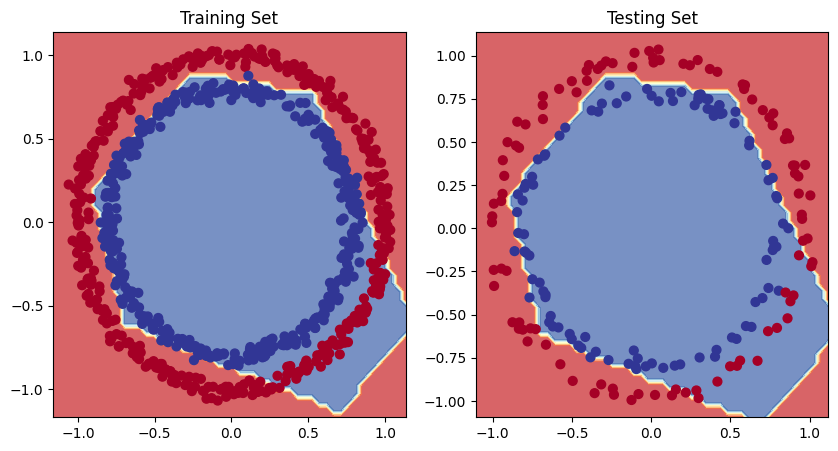

In [ ]:
# plot the decision boundary
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Training Set")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Testing Set")
plot_decision_boundary(model_10, X_test, y_test)
plt.show();

## More classification evaluation methods

**Note** - to remember the false/true positive and negatives thisk of it as Flasely posivtive and truely negqative

> * increase **precision** - reduce false

positives
* increase **recall** - reduce false negatives

>If you try to increse of the two the other is lowered

>* **f1 score**- overall evaluation of the model

This has its own advantages and disadvantages
* **Confusion matrix**

In [ ]:
# Check the curacy of the model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set : {loss}")
print(f"The accuracy of the model on the test set is {accuracy * 100:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.8950
Model loss on the test set : 0.2901916801929474
The accuracy of the model on the test set is 89.50%


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score,  precision_score, recall_score

# make predictions
y_preds = model_10.predict(X_test)

y_preds[:10]

7/7 [==============================] - 0s 2ms/step


array([[0.8214222 ],
       [0.01620483],
       [0.8214222 ],
       [0.07016439],
       [0.8214222 ],
       [0.8214222 ],
       [0.00101459],
       [0.00229115],
       [0.7430192 ],
       [0.00782731]], dtype=float32)

convert y_preds to binary from prediction probabilites (ouput from sigmoid)

In [ ]:
# converting the y_preds probabilities to binary format
y_preds_bin = tf.round(y_preds)

y_preds_bin[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# create confusion matrix
confusion_matrix(y_test, y_preds_bin)

array([[84, 16],
       [ 5, 95]])

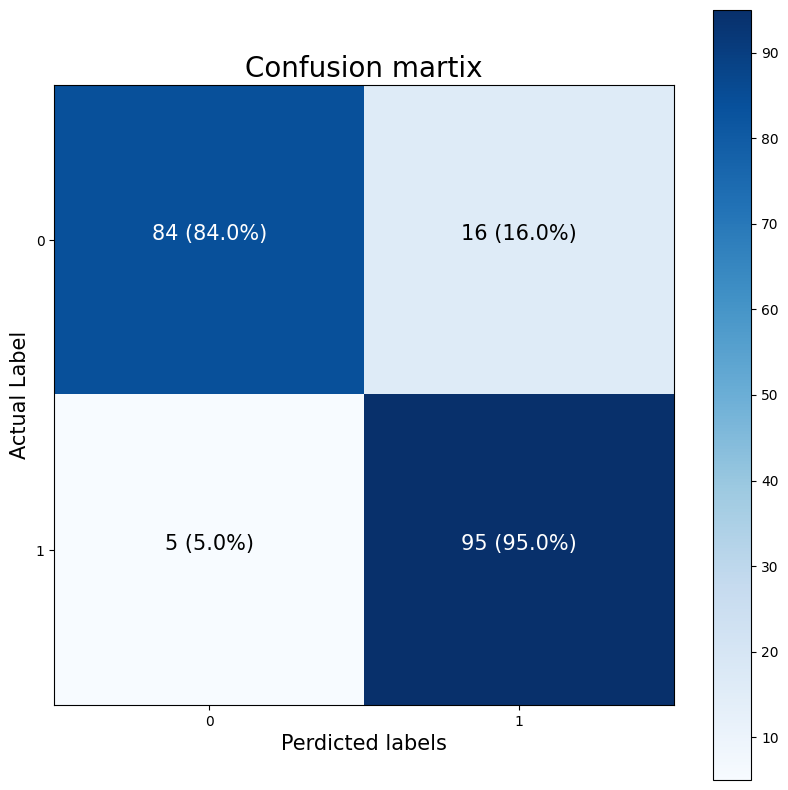

In [ ]:
# prettify the confusion matrix (sklearns plot confusion matrix)
import itertools

figsize=(10,10)

# create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# lets prettify the plotting
fig, ax = plt.subplots(figsize=figsize)
# cerate matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axes
ax.set(title="Confusion martix",
       xlabel="Perdicted labels",
       ylabel="Actual Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set x_axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# adjust ylabel size
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ax.title.set_size(20)

# set the threshold
threshold = (cm.max()+cm.min()) / 2

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
# prettify the confusion matrix (sklearns plot confusion matrix)
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_prettier(y_true, y_preds, figsize=(10,10), classes = None, text_size=10):

  """
  A function to plot the confusion matrix is a more
  visually understandable manner inspred by the plot_confusion_matrix function offered by sklearn
   """

  # create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # lets prettify the plotting
  fig, ax = plt.subplots(figsize=figsize)
  # cerate matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title="Confusion martix",
        xlabel="Perdicted labels",
        ylabel="Actual Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # set x_axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # adjust ylabel size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set the threshold
  threshold = (cm.max()+cm.min()) / 2

  # plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)


In [ ]:
# y_preds = model_10.predict(X_test)
# plot_confusion_matrix_prettier(y_test, y_preds)

## Working with a larger example (multiclass classification)

when you have more than 2 classes as labels it is known as **multiclass classification problem**.

To practice this concept we are going to build a neural network to classify images of different items of clothing

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

tf.__version__

'2.12.0'

In [ ]:
# The data has already been sorted into training and test sets
(train_data, train_labels) , (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# shoe the first training example
print(f"Training data example:\n{train_data[0]}\n")
print(f"Training label example:\n{train_labels[0]}\n")

Training data example:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1

In [ ]:
# check the shaape of a single example
train_data[0].shape , train_labels[0].shape

((28, 28), ())

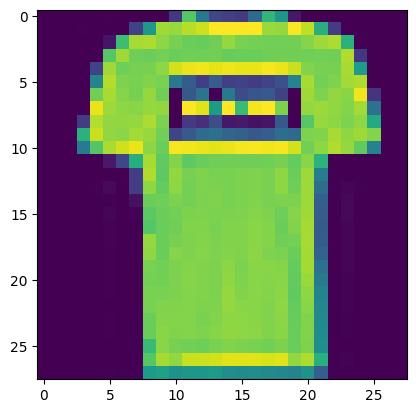

In [ ]:
# visualize a single sample data
import matplotlib.pyplot as plt
plt.imshow(train_data[1], cmap="gray")

In [ ]:
# check our samples label
train_labels[1]

0

In [ ]:
# create a small list to index the value of the training label
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag","Ankle_boot"]

Text(0.5, 1.0, 'Pullover')

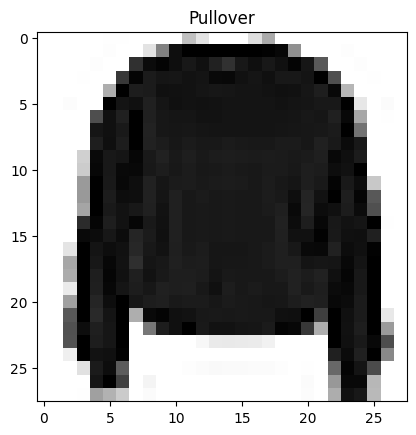

In [ ]:
# visualize a single sample data
import matplotlib.pyplot as plt
index_choice = 7
plt.imshow(train_data[index_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_choice]])

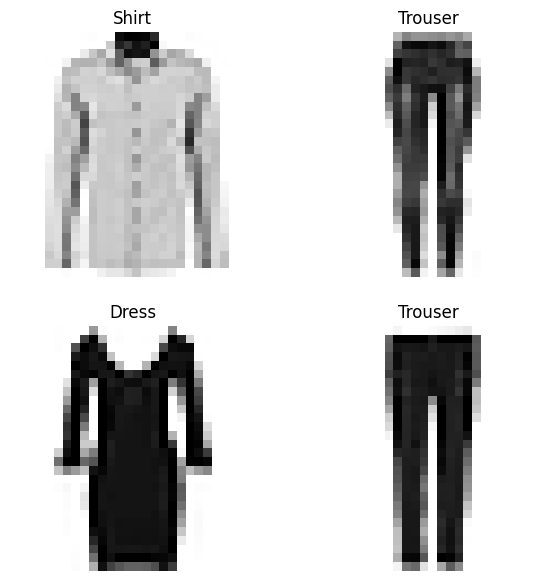

In [ ]:
# create a function to visualise some random samples of data
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  random_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index], cmap="binary")
  plt.title(class_names[train_labels[random_index]])
  plt.axis(False)

Observing the data we can notice that the model will require non-linear data to ovserve patterns

## Building a multiclass-classification model

smililar architecture to binary classification model and alter -
* input shape = 28 x 28
* output shape = 10
* loss function = catergorical cross entropy
* output layer activation = *softmax* not sigmoid

In [ ]:
test_data[0].shape

(28, 28)

In [ ]:
len(class_names)

10

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # makes input fomr 28,28 to 784
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # usually categorical cross-entropy expects one-hot encoded manner so using
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# make the lr schedular callback (not used in this exaple but writing for practice)
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4* 10 **(epoch/20))

# fit the model
non_norm_history = model_11.fit(train_data,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data, test_labels)) # this data is unseen

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4484 - accuracy: 0.1199 - val_loss: 2.2108 - val_accuracy: 0.1415
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1859 - accuracy: 0.1530 - val_loss: 2.1613 - val_accuracy: 0.1608
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0728 - accuracy: 0.1926 - val_loss: 2.0157 - val_accuracy: 0.2069
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.9349 - accuracy: 0.2359 - val_loss: 1.7272 - val_accuracy: 0.3205
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5924 - accuracy: 0.3365 - val_loss: 1.5362 - val_accuracy: 0.3440
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4466 - accuracy: 0.3932 - val_loss: 1.4401 - val_accuracy: 0.3992
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3778 - accuracy: 0.4191 - val_loss: 1.3547 - val_accuracy:

To use one-hot encoding preferred - `CategoricalCrossEntropy()`

 test_data in interger format -> `tf.one_hot(__, dpeth=len(class_names))`

else use
`SparseCategoricalCrossEntropy()`

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 4)                 3140      
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# checking min and max of the trainingg data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized) this means they like to have numbers in the tensor between 0 and 1

In [ ]:
# we can get out training and testing data between 0 and 1 by dividing by max
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# checking min and max of the trainingg data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # makes input fomr 28,28 to 784
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# compile the model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# make the lr schedular callback (not used in this exaple but writing for practice)
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4* 10 **(epoch/20))

# fit the model
norm_history = model_12.fit(train_data_norm,
                             tf.one_hot(train_labels,depth=10),
                             epochs=10,
                             validation_data=(test_data_norm, tf.one_hot(test_labels,depth=10))) # this data is unseen

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2331 - accuracy: 0.5356 - val_loss: 0.7580 - val_accuracy: 0.7065
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6832 - accuracy: 0.7374 - val_loss: 0.6805 - val_accuracy: 0.7511
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6174 - accuracy: 0.7649 - val_loss: 0.6272 - val_accuracy: 0.7512
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5834 - accuracy: 0.7804 - val_loss: 0.6003 - val_accuracy: 0.7740
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5632 - accuracy: 0.7867 - val_loss: 0.6114 - val_accuracy: 0.7783
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5429 - accuracy: 0.8024 - val_loss: 0.5715 - val_accuracy: 0.8023
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5245 - accuracy: 0.8169 - val_loss: 0.6091 - val_accuracy:

As we can observe just a slight change in the type of data into the model (normalize the data) the model accuracy shoots up from 0.3 to 0.7. This is almost double the improvement observed !

<Axes: title={'center': 'Normalized Data'}>

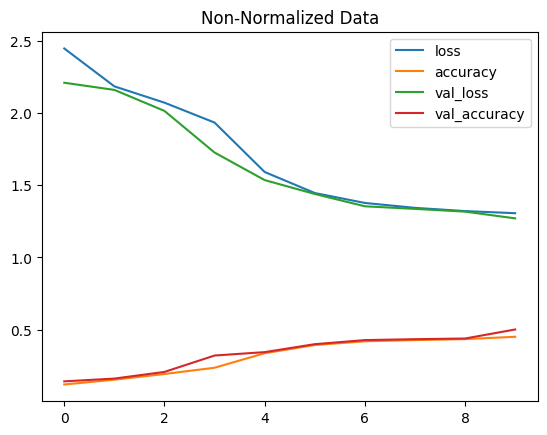

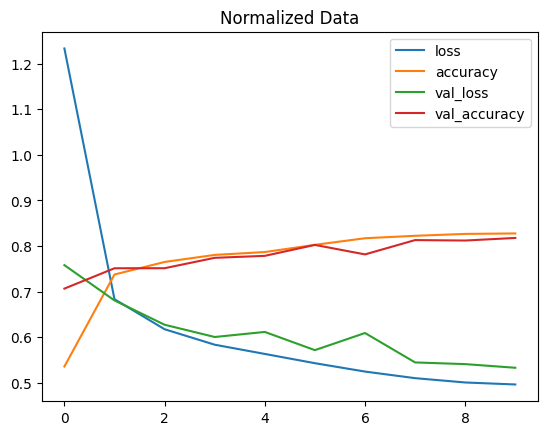

In [ ]:
 # plot the difference in the history loss curves
 import pandas as pd

 pd.DataFrame(non_norm_history.history).plot(title='Non-Normalized Data')
 pd.DataFrame(norm_history.history).plot(title='Normalized Data')

The convergence in the model is much faster than non-normalized data.

**Note**: The same model with even slightly different data can produce dramatically different results, it's important to make sure you are comparing them on the *same data and different architecture* or *different data and same model*

## Finding the ideal learning rate

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# compile the model
model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# make the lr schedular callback (not used in this exaple but writing for practice)
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4* 10 **(epoch/20))

# fit the model
model_13_history = model_13.fit(train_data_norm,
                             tf.one_hot(train_labels,depth=10),
                             epochs=40,
                             callbacks=[lr_schedular],
                             validation_data=(test_data_norm, tf.one_hot(test_labels,depth=10))) # this data is unseen

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8968 - accuracy: 0.2788 - val_loss: 1.5717 - val_accuracy: 0.3217 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3261 - accuracy: 0.4592 - val_loss: 1.1703 - val_accuracy: 0.5195 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0651 - accuracy: 0.5962 - val_loss: 1.0065 - val_accuracy: 0.6231 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9426 - accuracy: 0.6557 - val_loss: 0.9176 - val_accuracy: 0.6621 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8683 - accuracy: 0.6833 - val_loss: 0.8563 - val_accuracy: 0.6919 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8121 - accuracy: 0.7069 - val_loss: 0.8057 - val_accuracy: 0.7173 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [============

Text(0.5, 1.0, 'Learning rate decay curve')

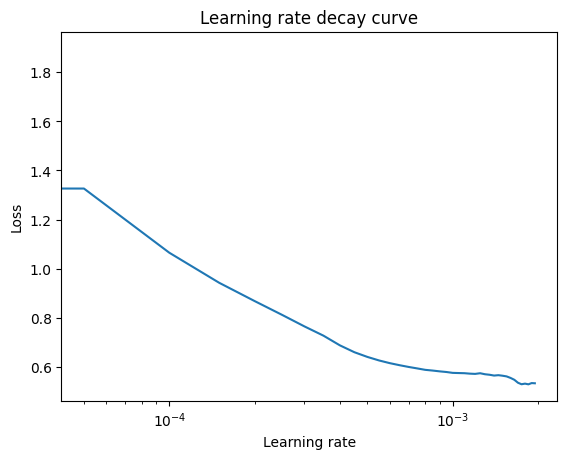

In [ ]:
# plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-4 * (10*tf.range(40)/20)
plt.semilogx(lrs, model_13_history.history['loss'])
plt.ylabel("Loss")
plt.xlabel("Learning rate")
plt.title("Learning rate decay curve")

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# compile the model
model_14.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(0.001),
                 metrics=["accuracy"])


# fit the model
model_14_history = model_13.fit(train_data_norm,
                             tf.one_hot(train_labels,depth=10),
                             epochs=20,
                             validation_data=(test_data_norm, tf.one_hot(test_labels,depth=10))) # this data is unseen

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5291 - accuracy: 0.8193 - val_loss: 0.5509 - val_accuracy: 0.8102
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5247 - accuracy: 0.8211 - val_loss: 0.5964 - val_accuracy: 0.8031
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5228 - accuracy: 0.8224 - val_loss: 0.6058 - val_accuracy: 0.7895
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5155 - accuracy: 0.8230 - val_loss: 0.5674 - val_accuracy: 0.8136
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5209 - accuracy: 0.8213 - val_loss: 0.5821 - val_accuracy: 0.8023
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5138 - accuracy: 0.8242 - val_loss: 0.6114 - val_accuracy: 0.7975
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5156 - accuracy: 0.8244 - val_loss: 0.5643 - val_accuracy:

## Evaluating out multiclass classification model

We could use -
* Evaluate using confusion matrix
* asses predictions through visualization
* Improve this by modifing sturcture or training longer
* save and export it for use in an application

In [ ]:
# Seeing the confusion matrix
y_probs = model_13.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[1.7441261e-07, 2.6254918e-09, 1.5630622e-09, 2.6187828e-07,
        7.9762480e-10, 1.1396031e-01, 1.7064764e-09, 1.2525047e-01,
        1.3627950e-04, 7.6065248e-01],
       [2.6401703e-03, 5.9082635e-07, 8.1634414e-01, 3.2028777e-06,
        6.8385459e-02, 1.2600024e-14, 1.1257509e-01, 2.6680923e-25,
        5.1256306e-05, 6.9917443e-27],
       [1.0945121e-03, 9.9148732e-01, 3.4812295e-03, 1.2904089e-03,
        3.8510054e-05, 2.5175409e-03, 8.3433486e-05, 2.5405659e-06,
        4.5947845e-06, 2.6485623e-09],
       [8.0314197e-04, 9.9045169e-01, 3.5994083e-03, 1.3077453e-03,
        6.1188766e-05, 3.6855182e-03, 7.1558003e-05, 1.3821694e-05,
        5.8678706e-06, 8.1892653e-09],
       [1.9560950e-01, 1.7524505e-03, 1.8436900e-01, 1.7642717e-01,
        6.1839089e-02, 1.4407931e-06, 3.7099910e-01, 2.6550628e-10,
        9.0022879e-03, 6.8597912e-11]], dtype=float32)

In [ ]:
y_probs[0] , tf.argmax(y_probs[0]) , class_names[tf.argmax(y_probs[0]).numpy()]

(array([1.7441261e-07, 2.6254918e-09, 1.5630622e-09, 2.6187828e-07,
        7.9762480e-10, 1.1396031e-01, 1.7064764e-09, 1.2525047e-01,
        1.3627950e-04, 7.6065248e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle_boot')

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle_boot']

In [ ]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

NameError: ignored

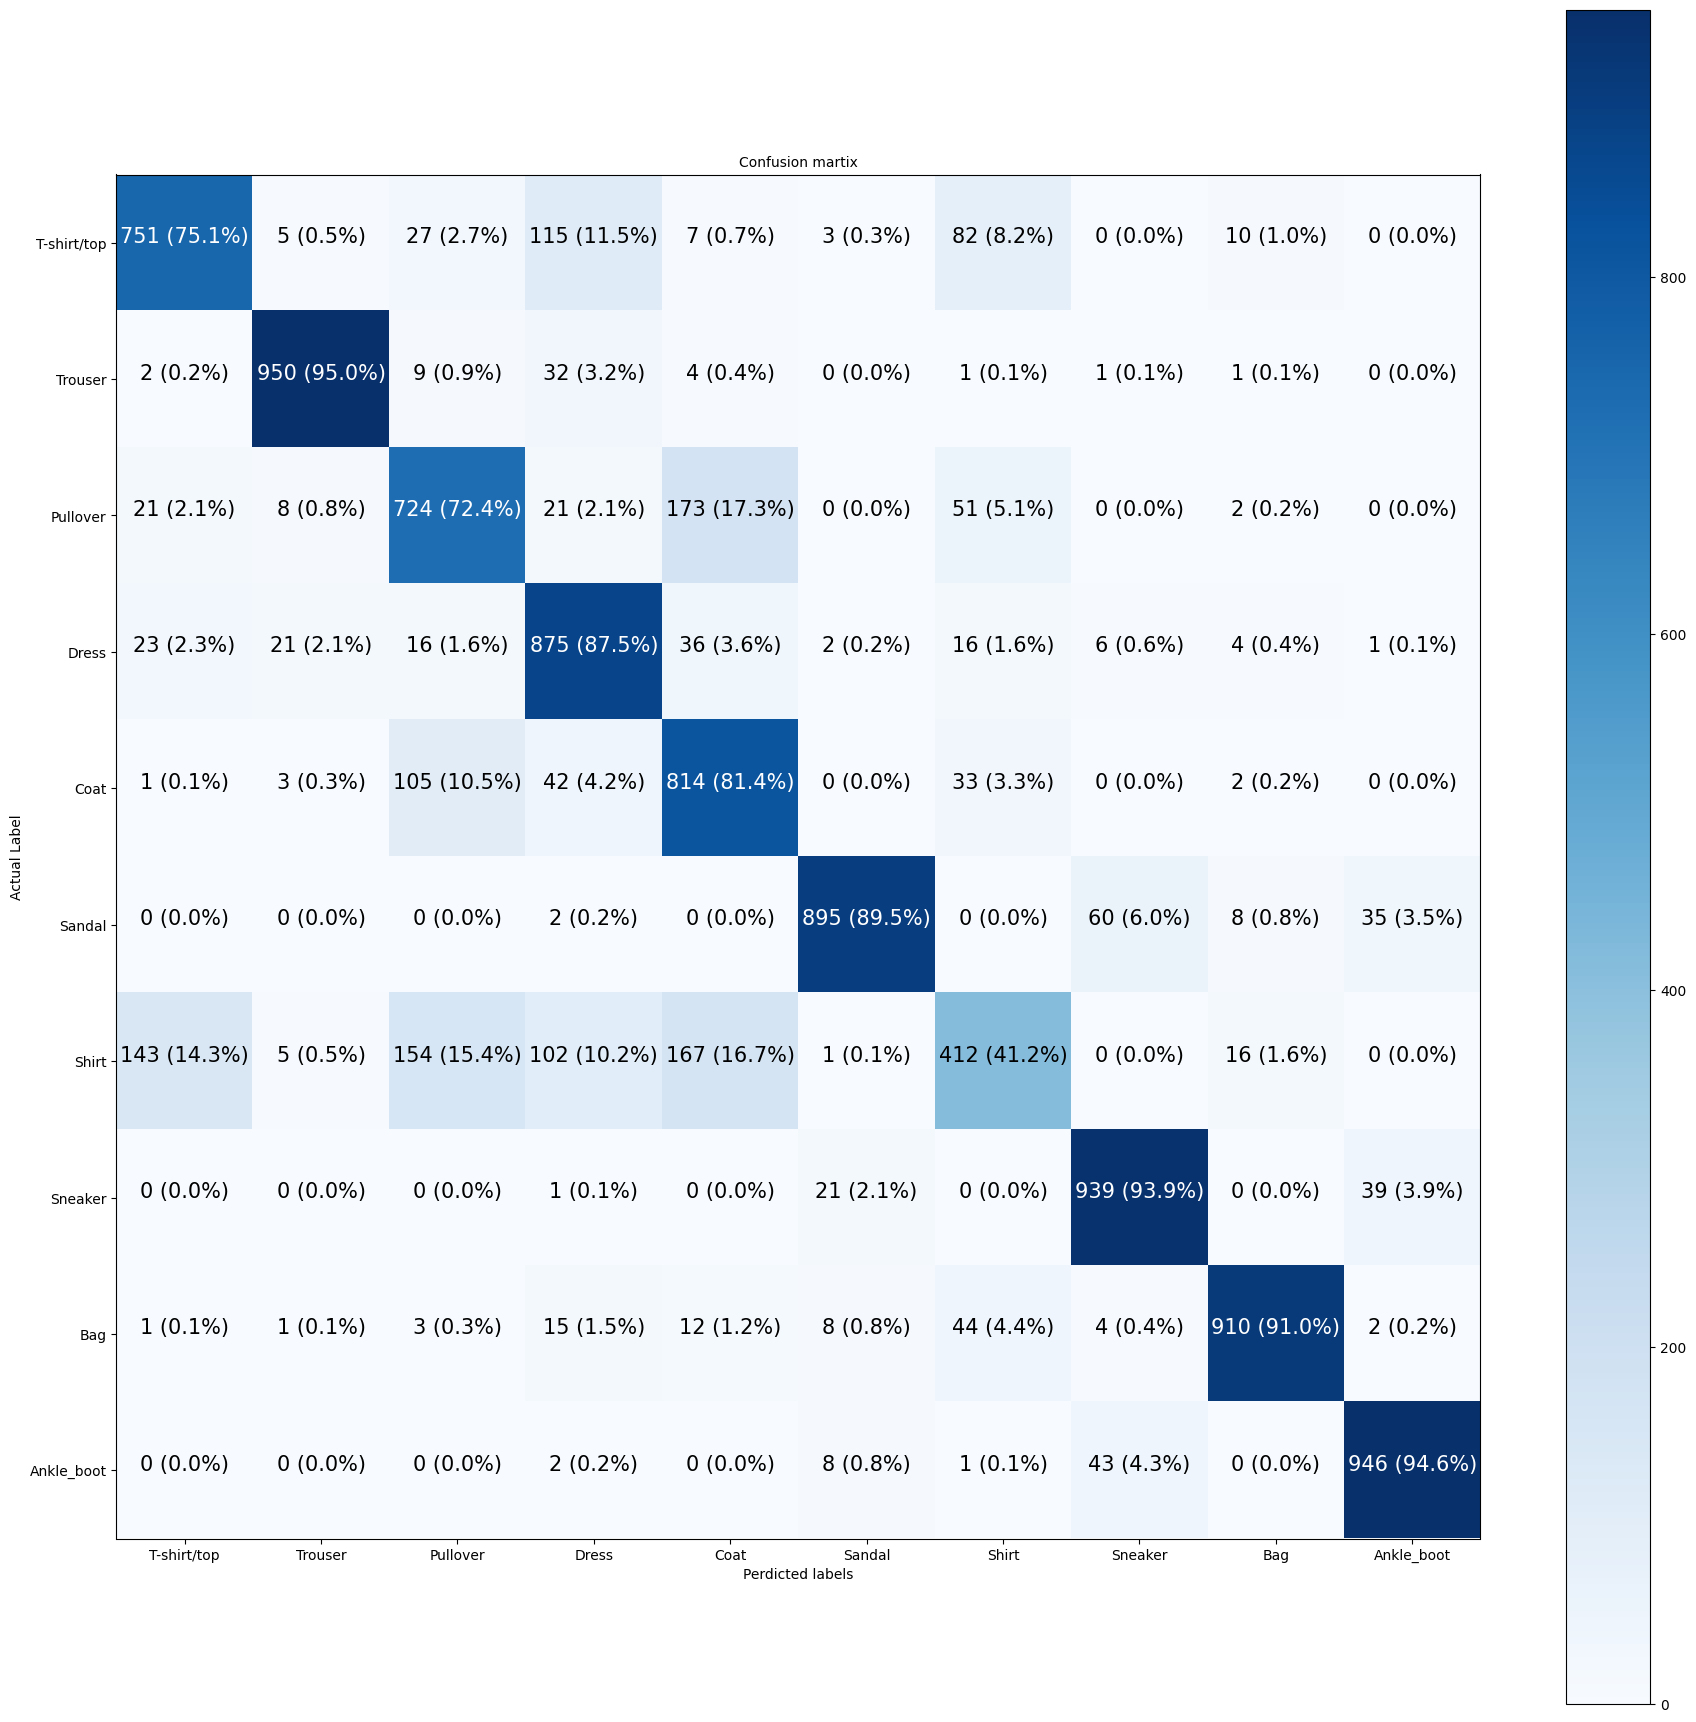

In [ ]:
# make the confusion matrix
plot_confusion_matrix_prettier(y_true=test_labels, y_preds=y_preds, classes=class_names, figsize=(22,22) )

**Note :** Often when working with visual data, it is good to try to visualise as much as possible to understand the data properly

Create a function for
* plot a random image
* make prediction on image
* label with true value and predicted value

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image and plot it with true and predicted labels
  """
  # set random integer
  i = random.randint(0, len(images))

  # create predictions and targets
  target_image = images[i]
  pred_probability = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probability.argmax()]
  true_label = classes[true_labels[i]]

  # plot the img
  plt.imshow(target_image, cmap=plt.cm.binary)

  # change the color of the title depending on correct prediction or not
  if true_label == pred_label:
    color = 'green'
  else:
    color = 'red'

  # add xlabel information
  plt.xlabel(f"Preds:{pred_label} {100 * tf.round(tf.reduce_max(pred_probability))} (True: {true_label})", color=color)

1/1 [==============================] - 0s 104ms/step


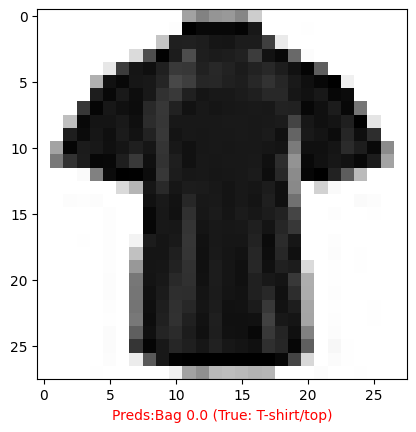

In [ ]:
# check out random image and its prediction
plot_random_image(model_14, images=test_data_norm, true_labels=test_labels, classes=class_names)

So we can deduce the model is having problems in the prediction of the class "shirts"

1/1 [==============================] - 0s 35ms/step


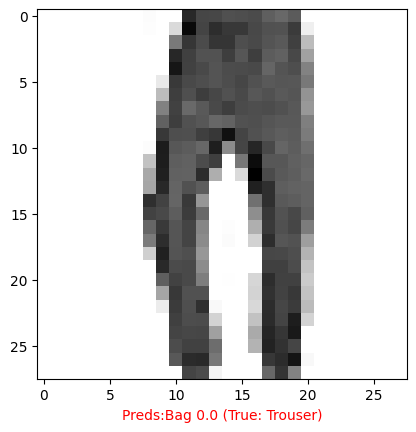

In [ ]:
# check out random image and its prediction
plot_random_image(model_14, images=test_data_norm, true_labels=test_labels, classes=class_names)

## What patterns is out model learning ?

In [ ]:
# Structure of the model
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 4)                 3140      
                                                                 
 dense_35 (Dense)            (None, 4)                 20        
                                                                 
 dense_36 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# find layers of out moset recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# shapes
weights, weights.shape

(array([[ 0.00057752, -0.06752175, -0.04241669, -0.03899115],
        [-0.05999011, -0.0478826 , -0.07744629, -0.04490807],
        [-0.04366251,  0.08208397,  0.03755544,  0.0802922 ],
        ...,
        [-0.04182477, -0.03103784, -0.06767698, -0.04004634],
        [ 0.05741112, -0.06390395, -0.0404659 ,  0.05347215],
        [ 0.08666785,  0.03741208,  0.06841534,  0.08376279]],
       dtype=float32),
 (784, 4))

So this is flattened layer 784 to layer with 4 neurons (784, 4)

In [ ]:
biases, biases.shape

(array([0., 0., 0., 0.], dtype=float32), (4,))

One value per layer, each of these is paired with a weights matrix.

The bias vecto dictates how much the pattern within the corersponding weights matrix should influence the next layer

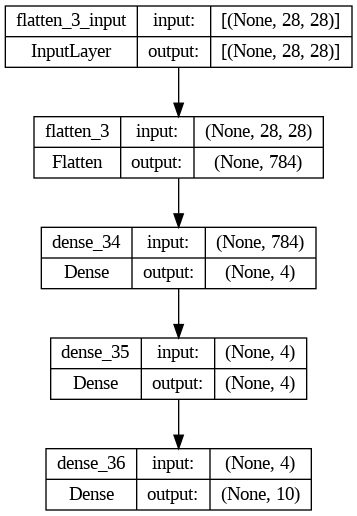

In [ ]:
# lets see another way to view our deep learnign code
from tensorflow.keras.utils import plot_model
plot_model(model_14, show_shapes=True)